In [7]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
def calculate_entropy(labels):
  label_counts = {}
  for label in labels:
      if label not in label_counts:
          label_counts[label] = 1
      else:
          label_counts[label] += 1
  num_instances = len(labels)

  entropy=0
  for label in label_counts:
    prob = label_counts[label]/float(num_instances)
    if prob > 0:
      entropy -= prob * math.log2(prob)
  return entropy

In [5]:
data = {
    'Age': ['Senior', 'Senior', 'Middle-aged', 'Youth', 'Youth', 'Youth', 'Middle-aged', 'Senior', 'Senior', 'Youth', 'Senior', 'Middle-aged', 'Middle-aged', 'Youth'],
    'Income': ['High', 'High', 'High', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium'],
    'Student': ['No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No'],
    'Credit_rating': ['Fair', 'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent', 'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent', 'Excellent', 'Fair', 'Excellent'],
    'Buys_computer': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
df_encoded = pd.get_dummies(df, drop_first=True)

# Variable = 'Buys_computer_Yes'
X = df_encoded.drop('Buys_computer_Yes', axis=1)
y = df_encoded['Buys_computer_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Accuracy: 66.67%


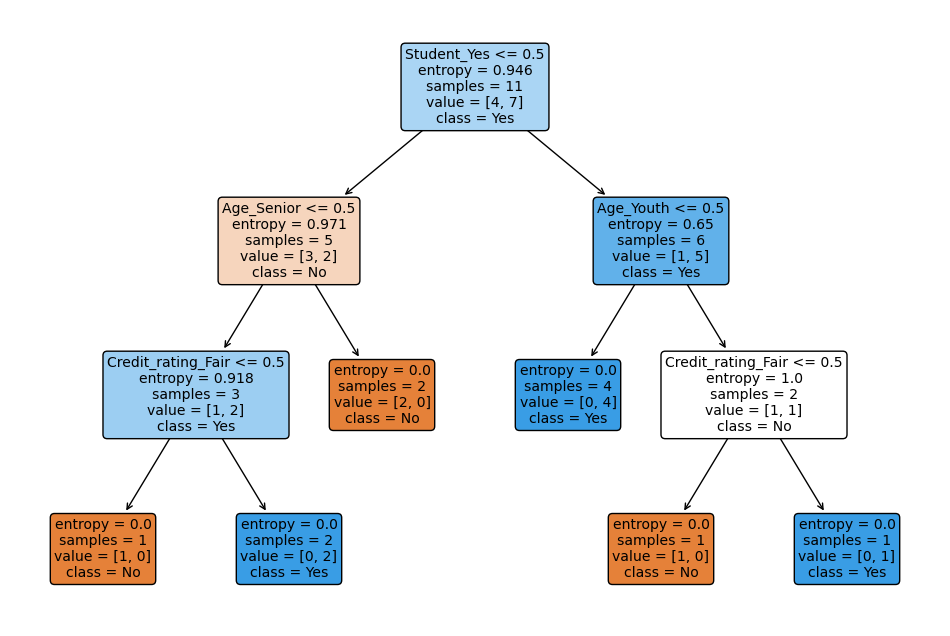

In [8]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns,
          class_names=['No', 'Yes'], rounded=True)
plt.show()